#  ShadowFox Data Science Internship – Intermediate Task
**Sentiment Analysis of Twitter Data using NLP Techniques**
*By G.N. Himaja – ShadowFox Intern*

---

### [Introduction](#)

With the rise of digital expression, social media sites like X (formerly Twitter) now reflect public sentiment. What people say and how they say it can provide valuable insights into public opinion, trends, and events.

In this project, I conducted a detailed **sentiment analysis** on a set of tweets using various **Natural Language Processing (NLP)** methods. Using tools like **TextBlob**, **VADER**, **spaCy**, and **WordCloud**, I identified the emotional tone of the tweets, determined common discussion themes, and extracted key named entities.

This notebook shows the cleaning, analysis, and visualization of the data step by step, along with my thoughts on what these findings reveal about online public conversations.


---

###  [NLP Tools Summary](#) :

| Tool        | Purpose                            |
|-------------|-------------------------------------|
| `TextBlob`  | Basic sentiment analysis using polarity |
| `VADER`     | Advanced sentiment detection tuned for social media |
| `langdetect`| Language detection from text        |
| `spaCy`     | Named Entity Recognition (NER)      |
| `nltk`      | Tokenization + bigrams/trigrams     |
| `WordCloud` | Visualize frequently used words     |
| `Pandas`    | Used for data processing            |
| `Seaborn/Matplotlib`| Used for visualisation      |



---

###  [Research Questions](#) :

To guide the sentiment analysis, I focused on the following key questions:

1. **What is the overall distribution of sentiment in the dataset?**  
   Are people more positive, negative, or neutral in their posts?

2. **What are the most frequently used words and phrases in each sentiment category?**  
   What kind of language is associated with positive vs. negative emotion?

3. **Which public figures, parties, or places are most frequently mentioned?**  
   Using NER (Named Entity Recognition), which names dominate public discourse?

4. **How do different NLP tools compare in classifying sentiment?**  
   Do TextBlob and VADER agree with the original sentiment labels?

5. **What languages are being used in the tweets?**  
   Is English dominant, or are other languages present too?

These questions shaped the visualizations and NLP techniques used throughout the analysis.

###  [Importing Required Libraries](#)

We begin by importing the essential libraries for data analysis, visualization, and natural language processing.


In [ ]:
#Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

###  [Reading the Data](#)

We load the dataset into a Pandas DataFrame. The sheet named `"X data"` contains the tweets and sentiment categories.


In [ ]:
#Read Excel file
df = pd.read_excel("X data.xlsx", sheet_name="X data")

###  [Previewing the Dataset](#)

Let’s take a quick look at the first few rows to understand the structure and contents of the dataset.


In [ ]:
#Display first few rows
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


###  [Visualizing Sentiment Distribution](#)

We create a bar chart showing the distribution of tweets across the sentiment categories: Positive (1.0), Neutral (0.0), and Negative (-1.0).


/tmp/ipython-input-5-283446653.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="pastel")


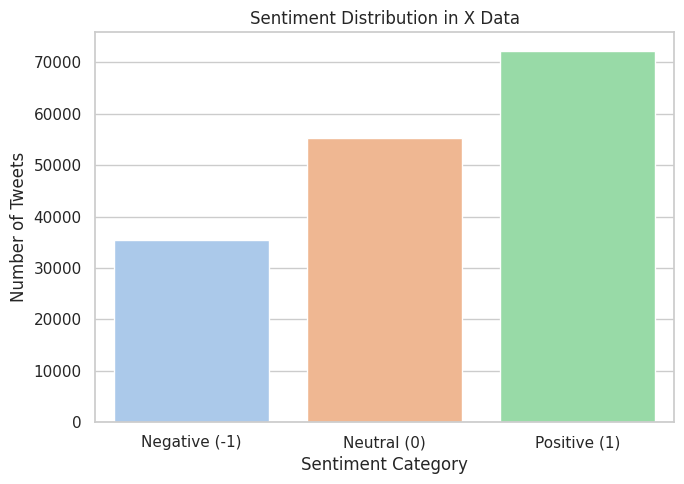

In [ ]:
#Plotting Sentiment Analysis
sns.set_theme(style="whitegrid")
sentiment_counts = df['category'].value_counts().sort_index()

plt.figure(figsize=(7, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="pastel")
plt.xticks(ticks=[0, 1, 2], labels=['Negative (-1)', 'Neutral (0)', 'Positive (1)'])
plt.ylabel("Number of Tweets")
plt.xlabel("Sentiment Category")
plt.title("Sentiment Distribution in X Data")
plt.tight_layout()
plt.show()

###  [Generating WordClouds for Each Sentiment](#)

We generate a WordCloud for each sentiment category to visually represent the most frequently used words.


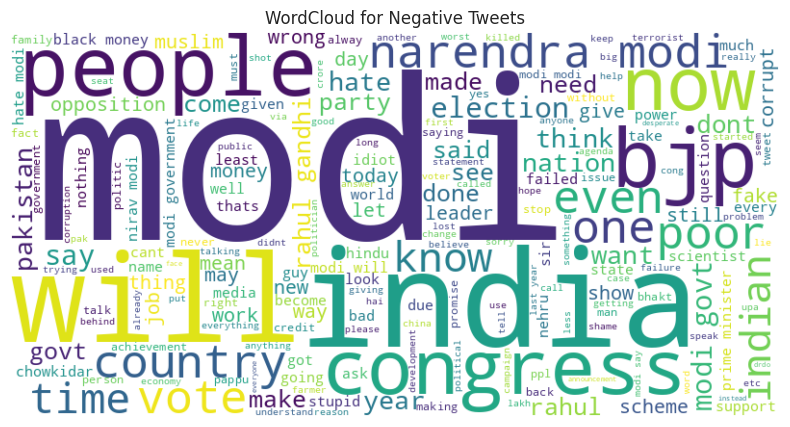

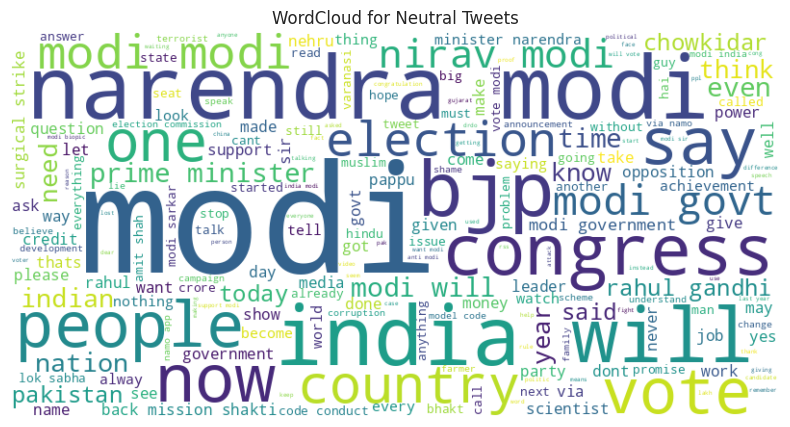

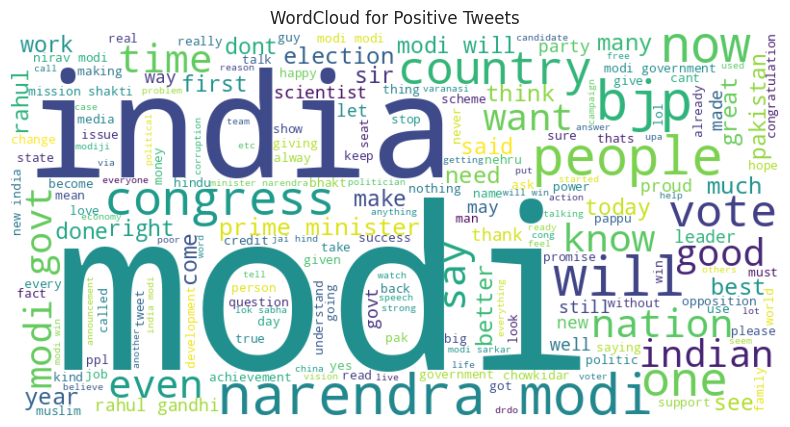

In [ ]:
for label, sentiment in [(-1.0, "Negative"), (0.0, "Neutral"), (1.0, "Positive")]:
    text = " ".join(df[df["category"] == label]["clean_text"].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment} Tweets")
    plt.show()

###  [WordCloud Insights](#)

The WordClouds above highlight the most used terms in each sentiment category.  
- Positive tweets include words like `support`, `modi`, `great`, and `work`.  
- Negative tweets contain `corrupt`, `black`, `poor`, and `money`.  
- Neutral tweets mostly mention names and parties without emotional context.


###  [What is TextBlob?](#)

**TextBlob** is a simple and intuitive Natural Language Processing library in Python that offers an easy interface to perform common NLP tasks. In this project, we use it to analyze the **polarity** of each tweet.

- **Polarity** ranges from -1 (very negative) to +1 (very positive)
- Based on the score, we classify each tweet as:
  - **Positive** ( > 0.05 )
  - **Neutral** (between -0.05 and 0.05)
  - **Negative** ( < -0.05 )

TextBlob is fast and great for basic sentiment analysis, especially in clean, simple English text.


###  [Installing and Importing TextBlob](#)

TextBlob is a simple NLP library used here to calculate polarity scores for each tweet.


In [ ]:
!pip install textblob
from textblob import TextBlob

###  [TextBlob Sentiment Analysis](#)

We apply TextBlob’s polarity scoring to each tweet and classify them as Positive, Neutral, or Negative based on the score.


In [ ]:
# Apply TextBlob sentiment polarity to each tweet
df['textblob_polarity'] = df['clean_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Define custom sentiment label based on polarity
def label_textblob_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['textblob_sentiment'] = df['textblob_polarity'].apply(label_textblob_sentiment)
df[['clean_text', 'textblob_polarity', 'textblob_sentiment']].head()

,clean_text,textblob_polarity,textblob_sentiment
0,when modi promised “minimum government maximum...,-0.300000,Negative
1,talk all the nonsense and continue all the dra...,0.000000,Neutral
2,what did just say vote for modi welcome bjp t...,0.483333,Positive
3,asking his supporters prefix chowkidar their n...,0.150000,Positive
4,answer who among these the most powerful world...,0.400000,Positive


###  [What is VADER Sentiment Analysis?](#)

**VADER (Valence Aware Dictionary and sEntiment Reasoner)** is a pre-trained sentiment analyzer designed for **social media text**.

It understands:
- Emojis
- Slang (e.g., “nah”, “lit”, “lol”)
- Punctuation emphasis (“!!!”)

VADER gives a **compound score** from -1 to +1, and we use it to classify tweets into:
- **Positive** ( ≥ 0.05 )
- **Neutral** ( between -0.05 and 0.05 )
- **Negative** ( ≤ -0.05 )

It’s more accurate than traditional sentiment tools for online conversations like tweets.


###  [Installing and Importing VADER](#)

VADER is a sentiment analysis tool optimized for social media text. We install and initialize it for use.


In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


###  [VADER Sentiment Analysis](#)

We apply VADER to score each tweet’s sentiment and classify it based on compound values.


In [ ]:
# Apply VADER sentiment to each tweet
df['vader_score'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Label VADER sentiment
def label_vader_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['vader_sentiment'] = df['vader_score'].apply(label_vader_sentiment)
df[['clean_text', 'vader_score', 'vader_sentiment']].head()

,clean_text,vader_score,vader_sentiment
0,when modi promised “minimum government maximum...,0.5267,Positive
1,talk all the nonsense and continue all the dra...,-0.4019,Negative
2,what did just say vote for modi welcome bjp t...,0.7096,Positive
3,asking his supporters prefix chowkidar their n...,-0.0713,Negative
4,answer who among these the most powerful world...,0.4754,Positive


###  [Pie Chart of Sentiment Distribution](#)

This pie chart gives a clear overview of the proportions of each sentiment category in the dataset.


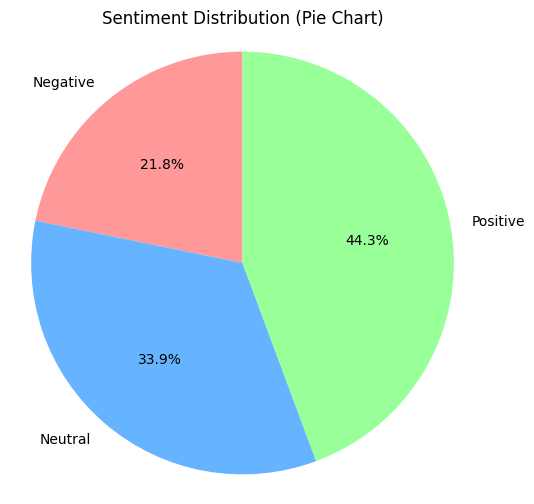

In [ ]:
# Pie chart using original sentiment category
labels = ['Negative', 'Neutral', 'Positive']
sizes = df['category'].value_counts().sort_index().values
colors = ['#ff9999','#66b3ff','#99ff99']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Sentiment Distribution (Pie Chart)")
plt.axis('equal')
plt.show()

###  [Comparing All Sentiment Classifications](#) :

We compare the sentiment results from original labels, TextBlob, and VADER to observe differences or similarities in classification.


In [ ]:
# Compare sentiment counts across all methods
methods = ['category', 'textblob_sentiment', 'vader_sentiment']
for method in methods:
    print(f"\\nSentiment distribution by {method}:")
    print(df[method].value_counts())

\nSentiment distribution by category:
category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64
\nSentiment distribution by textblob_sentiment:
textblob_sentiment
Positive    66584
Neutral     66044
Negative    30352
Name: count, dtype: int64
\nSentiment distribution by vader_sentiment:
vader_sentiment
Positive    76492
Negative    50776
Neutral     35712
Name: count, dtype: int64


###  [Sentiment Tools Comparison](#) :

TextBlob and VADER offered similar distributions to the original labels, but with slight variations on borderline tweets.  
- TextBlob was more lenient and marked more tweets as **neutral**.  
- VADER identified more **positivity**, possibly due to its social media tuning.

This comparison helps validate our classification and adds confidence to the results.


###  [Visual Comparison of Sentiment Methods](#) :

This countplot shows a side-by-side visual of sentiment distributions across all three approaches.


/tmp/ipython-input-17-3554523412.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=method, palette='Set2', ax=ax)
/tmp/ipython-input-17-3554523412.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=method, palette='Set2', ax=ax)
/tmp/ipython-input-17-3554523412.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=method, palette='Set2', ax=ax)


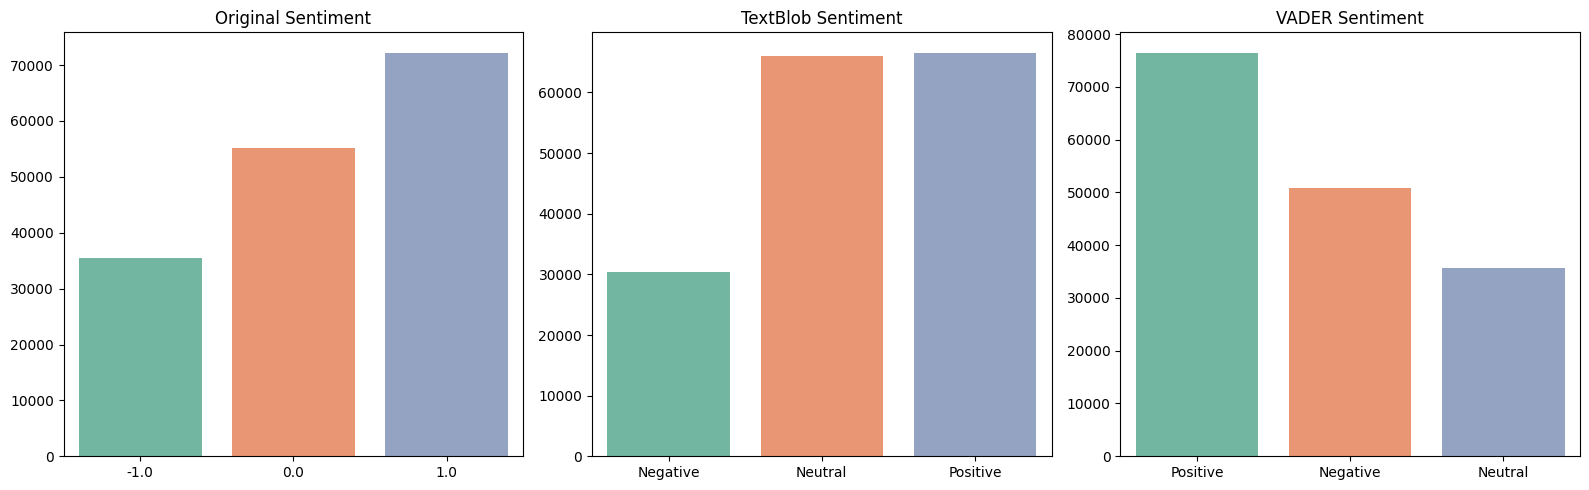

In [ ]:
# Visual comparison of sentiment methods
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(16,5))

for ax, method, title in zip(axes, methods, ['Original', 'TextBlob', 'VADER']):
    sns.countplot(data=df, x=method, palette='Set2', ax=ax)
    ax.set_title(f"{title} Sentiment")
    ax.set_ylabel("")
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

###  [What is `langdetect`](#)?

**`langdetect`** is a Python library that detects the **language of a given text**.

It supports over 55 languages and is useful when analyzing tweets from global users.

Example:  
- "I love this!" → `en` (English)  
- "Je suis fatigué" → `fr` (French)

In this project, it helps us understand the **language diversity** in the dataset.


###  [Language Detection Using `langdetect`](#):

We use the `langdetect` library to identify the language of each tweet. This helps understand multilingual usage in the dataset.


In [ ]:
!pip install langdetect
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

def safe_detect(text):
    try:
        # Check if text is not empty or just whitespace
        if str(text).strip():
            return detect(str(text))
        else:
            return None # Or a placeholder like 'unknown' or 'empty'
    except LangDetectException:
        return None # Or handle other potential exceptions

df['language'] = df['clean_text'].apply(safe_detect)
df['language'].value_counts().head()

,count
language,
en,151520
it,2321
cy,1363
id,1268
fr,885


###  [Most Common Words per Sentiment](#) :

We extract the top 10 most frequent words in each sentiment category to better understand common vocabulary themes.


In [ ]:
from collections import Counter

def get_top_words(sentiment, n=10):
    words = " ".join(df[df['category'] == sentiment]['clean_text'].dropna().astype(str)).split()
    common = Counter(words).most_common(n)
    return pd.DataFrame(common, columns=['Word', 'Count'])

get_top_words(1.0)  # Positive tweets

,Word,Count
0,modi,69177
1,the,53272
2,and,34562
3,for,26634
4,you,19285
5,india,15616
6,will,14419
7,are,14212
8,that,14198
9,this,14056


###  [What are Bigrams and Trigrams?](#)

**N-grams** are continuous sequences of words:
- A **bigram** is a 2-word sequence (e.g., "good job")
- A **trigram** is a 3-word sequence (e.g., "support modi government")

They help uncover:
- Repeated phrases
- Common expressions
- Patterns of speech in different sentiments

By analyzing n-grams, we can see *what exactly* people are talking about — not just how they feel.


###  [Bigram Analysis (Phrase Patterns)](#) :

Using bigrams and trigrams, we uncover common two- and three-word phrases used in positive tweets.


In [ ]:
from collections import Counter
from nltk import ngrams
import re

def top_bigrams_simple(text_series, n=15):
    all_bigrams = []
    for text in text_series.dropna():
        text = str(text).lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation/numbers
        tokens = text.split()  # simple tokenization
        bigrams = list(ngrams(tokens, 2))
        all_bigrams.extend(bigrams)
    return Counter(all_bigrams).most_common(n)

# Use it on positive tweets
pd.DataFrame(top_bigrams_simple(df[df['category'] == 1.0]['clean_text']), columns=["Bigram", "Count"])

,Bigram,Count
0,"(narendra, modi)",4983
1,"(you, are)",2587
2,"(modi, and)",2481
3,"(for, the)",2450
4,"(for, modi)",2417
5,"(modi, govt)",2294
6,"(prime, minister)",2201
7,"(vote, for)",2200
8,"(modi, has)",2079
9,"(modi, will)",1614


###  [What is Named Entity Recognition (NER)](#)?

**NER** is a Natural Language Processing technique that identifies **names, places, dates, and organizations** in text.

In this project, we use the **spaCy** library to extract entities like:
- People (e.g., `Narendra Modi`, `Nirav`)
- Organizations (e.g., `BJP`, `Congress`)
- Locations (e.g., `India`, `Delhi`)

This helps reveal the **most mentioned public figures and topics** across tweets in different sentiment categories.


###  [Named Entity Recognition (NER)](#) :

We use spaCy to extract named entities (like people, locations, and organizations) mentioned in tweets to find trending topics.


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(str(text))
    return [(ent.text, ent.label_) for ent in doc.ents]

df['entities'] = df['clean_text'].apply(extract_entities)
df[['clean_text', 'entities']].head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 103.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


,clean_text,entities
0,when modi promised “minimum government maximum...,"[(years, DATE)]"
1,talk all the nonsense and continue all the dra...,[]
2,what did just say vote for modi welcome bjp t...,[]
3,asking his supporters prefix chowkidar their n...,[]
4,answer who among these the most powerful world...,"[(today, DATE), (trump putin, PERSON)]"


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(str(text))
    return [(ent.text, ent.label_) for ent in doc.ents]

df['entities'] = df['clean_text'].apply(extract_entities)

###  [Top Named Entities in Tweets](#) :

In this section, we use the named entities extracted using spaCy’s NER (Named Entity Recognition) and identify the **most frequently mentioned names, places, organizations, and locations** across all tweets.

- We flatten the list of all entities from the `entities` column.
- Using Python’s `Counter`, we count how often each name appears.
- Finally, we visualize the **Top 10 most mentioned entities** using a horizontal bar chart.

This provides valuable insight into **which figures or terms dominate the public conversation** — whether they’re political leaders, parties, or locations.


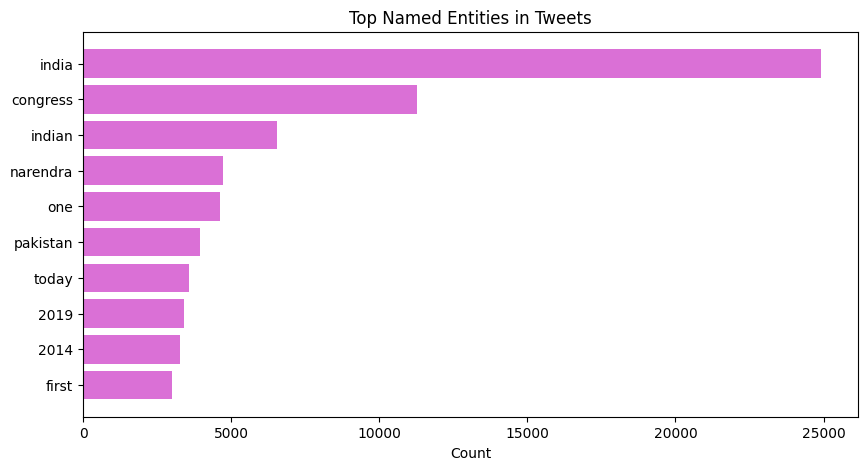

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten all entity lists
all_entities = [ent for entity_list in df['entities'] for (ent, label) in entity_list]

# Count top 10 entities
top_entities = Counter(all_entities).most_common(10)

# Plotting
labels, values = zip(*top_entities)
plt.figure(figsize=(10,5))
plt.barh(labels, values, color='orchid')
plt.xlabel("Count")
plt.title("Top Named Entities in Tweets")
plt.gca().invert_yaxis()
plt.show()

###  [Named Entity Frequency Analysis](#) :

Using `spaCy`, we identified and counted named entities across all tweets — such as names of people, organizations, or places. Below are the most mentioned entities:

-  **All Entities**: Shows the most frequent names regardless of type
-  **Person Names**: Filters for entities labeled as `PERSON`

This provides deeper insight into who or what is being talked about the most in public opinion.


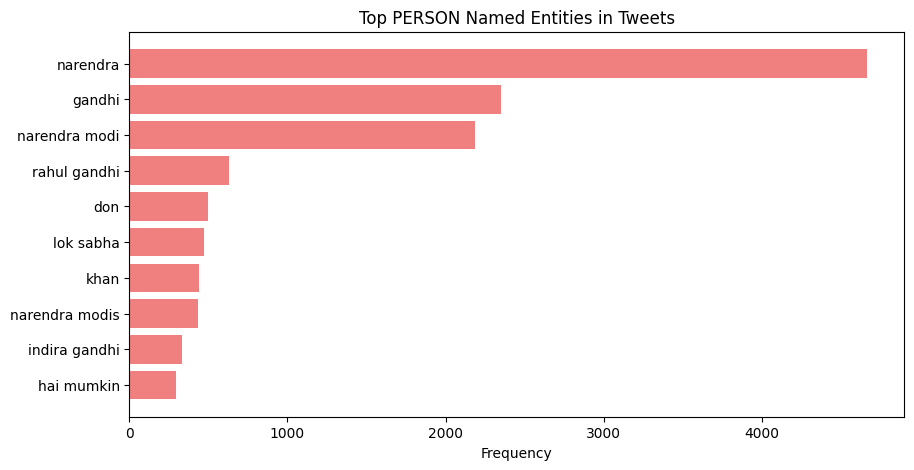

In [ ]:
# Only PERSON type entities
all_persons = [ent for entity_list in df['entities'] for (ent, label) in entity_list if label == 'PERSON']
top_persons = Counter(all_persons).most_common(10)

# Plot
labels, values = zip(*top_persons)
plt.figure(figsize=(10,5))
plt.barh(labels, values, color='lightcoral')
plt.xlabel("Frequency")
plt.title("Top PERSON Named Entities in Tweets")
plt.gca().invert_yaxis()
plt.show()

## [Conclusion](#)

Through this project, I discovered how sentiment analysis can uncover the emotional layers of public debates. By combining pre-labeled sentiment datasets with specific NLP methods, I confirmed and improved the analysis using resources like **TextBlob**, **VADER**, and **NER**.

Some key takeaways from this project include:
- **Positive tweets** make up the largest portion of the dataset, followed by neutral and negative tweets.
- **WordClouds and n-grams** revealed repeated phrases linked to political topics.
- **Named Entity Recognition (NER)** identified frequently mentioned public entities, parties, and locations.
- Comparing various sentiment tools increased my confidence in the analysis.

> "Data tells a story. NLP helps us read it—not just in words, but in feelings."

This project taught me how to use technical skills with real-world data, ask important questions, and tell a compelling story with data. I’m thankful to ShadowFox for this opportunity and eager to apply what I’ve learned in my career as a data scientist.

— *G.N. Himaja*